In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import scipy.stats as sts
import matplotlib.pyplot as plt
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [2]:
#I import CSV files
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

In [3]:
#I Merge 2 CSV files
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

pyber_data_df.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [4]:
#finding total rides
total_rides = pyber_data_df.groupby(["type"]).count()["ride_id"]
total_rides_df=pd.DataFrame(total_rides)
#finding total drivers
total_drivers = city_data_df.groupby("type").sum()["driver_count"]
total_drivers_df=pd.DataFrame(total_drivers)

#merging 2 dataframes
all_dataframes=pd.merge(total_rides_df, total_drivers_df, how="left", on=["type"])
all_dataframes


,ride_id,driver_count
type,,
Rural,125,78
Suburban,625,490
Urban,1625,2405


In [5]:
#finding total fares
total_fares = pyber_data_df.groupby(["type"]).sum()["fare"].map("${:,.2f}".format)


total_fares_df=pd.DataFrame(total_fares)

#merging all_dataframe and total_fares_df
all_dataframes=pd.merge(all_dataframes, total_fares_df, how="left", on=["type"])


all_dataframes

,ride_id,driver_count,fare
type,,,
Rural,125,78,"$4,327.93"
Suburban,625,490,"$19,356.33"
Urban,1625,2405,"$39,854.38"


In [6]:
average_fare_per_ride=pyber_data_df.groupby(["type"]).sum()["fare"]/pyber_data_df.groupby(["type"]).count()["ride_id"]

average_fare_per_ride=average_fare_per_ride.map("${:,.2f}".format)
average_fare_per_ride_df=pd.DataFrame(average_fare_per_ride)

#merging all_dataframe and average_fare_per_ride_df
all_dataframes=pd.merge(all_dataframes, average_fare_per_ride_df, how="left", on=["type"])
all_dataframes


,ride_id,driver_count,fare,0
type,,,,
Rural,125,78,"$4,327.93",$34.62
Suburban,625,490,"$19,356.33",$30.97
Urban,1625,2405,"$39,854.38",$24.53


In [7]:
average_fare_per_driver=pyber_data_df.groupby(["type"]).sum()["fare"]/city_data_df.groupby("type").sum()["driver_count"]
average_fare_per_driver=average_fare_per_driver.map("${:,.2f}".format)
average_fare_per_driver_df=pd.DataFrame(average_fare_per_driver)

#merging all_dataframe and average_fare_per_driver_df
all_dataframes=pd.merge(all_dataframes, average_fare_per_driver_df, how="left", on=["type"])
all_dataframes


,ride_id,driver_count,fare,0_x,0_y
type,,,,,
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,1625,2405,"$39,854.38",$24.53,$16.57


In [8]:
#changing dataframe column names
all_dataframes=all_dataframes.rename(columns={"ride_id":"Total Rides","driver_count":"Total Drivers","fare":"Total Fares","0_x":"Average Fare per Ride","0_y":"Average Fare per Driver"})
#deleting Index name
all_dataframes=all_dataframes.rename_axis(None)


all_dataframes



,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,1625,2405,"$39,854.38",$24.53,$16.57


In [9]:
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [10]:
#renaming columns
pyber_data_df=pyber_data_df.rename(columns={"city": "City", 'date':"Date","fare":"Fare", "ride_id": "Ride Id","driver_count": "No. Drivers", "type":"City Type"})
pyber_data_df

,City,Date,Fare,Ride Id,No. Drivers,City Type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [11]:
#setting index date column
pyber_data_df=pyber_data_df.set_index(["Date"])

pyber_data_df


,City,Fare,Ride Id,No. Drivers,City Type
Date,,,,,
2019-01-14 10:14:22,Lake Jonathanshire,13.83,5739410935873,5,Urban
2019-03-04 18:24:09,South Michelleport,30.24,2343912425577,72,Urban
2019-02-24 04:29:00,Port Samanthamouth,33.44,2005065760003,57,Urban
2019-02-10 23:22:03,Rodneyfort,23.44,5149245426178,34,Urban
2019-03-06 04:28:35,South Jack,34.58,3908451377344,46,Urban
...,...,...,...,...,...
2019-04-29 17:04:39,Michaelberg,13.38,8550365057598,6,Rural
2019-01-30 00:05:47,Lake Latoyabury,20.76,9018727594352,2,Rural
2019-02-10 21:03:50,North Jaime,11.11,2781339863778,1,Rural


In [12]:
new_dataframe = pyber_data_df[["City Type", "Fare"]].copy()

new_dataframe.index = pd.to_datetime(pyber_data_df.index)

new_dataframe



,City Type,Fare
Date,,
2019-01-14 10:14:22,Urban,13.83
2019-03-04 18:24:09,Urban,30.24
2019-02-24 04:29:00,Urban,33.44
2019-02-10 23:22:03,Urban,23.44
2019-03-06 04:28:35,Urban,34.58
...,...,...
2019-04-29 17:04:39,Rural,13.38
2019-01-30 00:05:47,Rural,20.76
2019-02-10 21:03:50,Rural,11.11


In [13]:
#Check the DataFrame using the info() method

new_dataframe.dtypes

City Type     object
Fare         float64
dtype: object

In [34]:
#Calculate the sum() of fares by the type of city and date using groupby()

calculate_sum=new_dataframe.groupby(["City Type","Date"]).sum()["Fare"]


calculate_sum_df=pd.DataFrame(calculate_sum)
calculate_sum_df

Fare
City Type Date                      
Rural     2019-01-01 09:45:36  43.69
          2019-01-02 11:18:32  52.12
          2019-01-03 19:51:01  19.90
          2019-01-04 03:31:26  24.88
          2019-01-06 07:38:40  47.33
...                              ...
Urban     2019-05-08 04:20:00  21.99
          2019-05-08 04:39:49  18.45
          2019-05-08 07:29:01  18.55
          2019-05-08 11:38:35  19.77
          2019-05-08 13:10:18  18.04

[2375 rows x 1 columns]

In [35]:
#Reset the index, which is needed for Step 10.

calculate_sum_df.reset_index(inplace = True) 
calculate_sum_df


,City Type,Date,Fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33
...,...,...,...
2370,Urban,2019-05-08 04:20:00,21.99
2371,Urban,2019-05-08 04:39:49,18.45
2372,Urban,2019-05-08 07:29:01,18.55
2373,Urban,2019-05-08 11:38:35,19.77


In [40]:
#creating a pivot table
pivot_df=pd.pivot_table(calculate_sum_df, index=["Date"],columns="City Type", values="Fare", aggfunc=np.sum)
pivot_df

City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [37]:
pivot_df.isnull().sum()

City Type
Rural       2250
Suburban    1750
Urban        750
dtype: int64

In [41]:
#Creating a new dataframe from the pivot table
New_df_for_pivot=pivot_df.loc['2019-01-01':'2019-04-28']
New_df_for_pivot_df=pd.DataFrame(New_df_for_pivot)
New_df_for_pivot


City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [42]:
#resampling
resample_df = pivot_df.resample('W').sum()
resample_df

City Type,Rural,Suburban,Urban
Date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


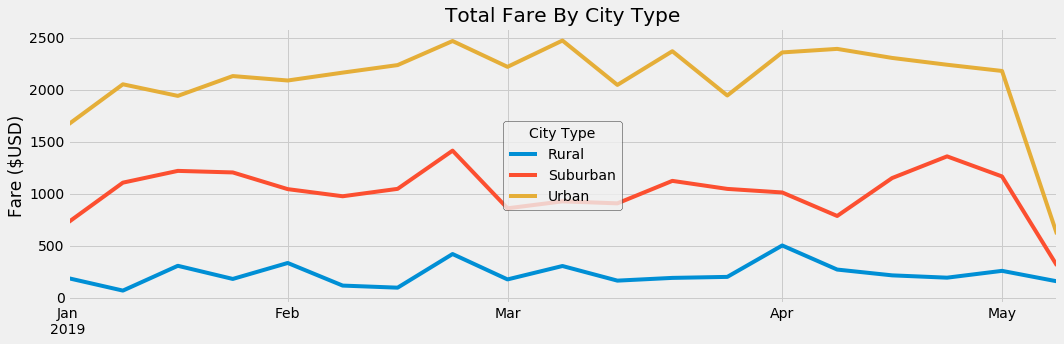

In [68]:
#creating plt
fig= resample_df.plot(figsize=(15,5))

fig.set_ylabel("Fare ($USD)")

plt.style.use("fivethirtyeight")
plt.xlabel("")
fig.set_title("Total Fare By City Type")
ax.set_ylabel("Fare($USD)")

plt.legend(loc="center",title="City Type",edgecolor="black")
plt.tight_layout()
plt.savefig("analysis/Fighomework.png")
plt.show()

